## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

#### Evaluation Metric:

## Importing necessary libraries

In [2]:
# Install imblearn package
%pip install imbalanced-learn

#Import libraries for data manipulation
import pandas as pd
import numpy as np

#Import Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Import over and undersampling methods
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Import metrics
from sklearn import metrics

#Import imputer
from sklearn.impute import SimpleImputer

#Import one hot encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#Import hyperparameter searches
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Import pipelines
from sklearn.pipeline import Pipeline

#Import Column transformer
from sklearn.compose import ColumnTransformer


#Import warnings
import warnings

warnings.filterwarnings("ignore")


Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [3]:
train_set = pd.read_csv('Train.csv.csv')
test_set = pd.read_csv('Test.csv.csv')

## Data Overview

#### Visualize the Datasets

In [4]:
#look at the first 5 rows of the train set
train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [5]:
#look at the first 5 rows of the test set
test_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [6]:
train_set.shape
test_set.shape
print(f'The train set has {train_set.shape[0]} rows and {train_set.shape[1]} columns')
print(f'The test set has {test_set.shape[0]} rows and {test_set.shape[1]} columns')

The train set has 20000 rows and 41 columns
The test set has 5000 rows and 41 columns


In [7]:
train_set.info()
test_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

Both the test and train datasets contain 40 float types and 1 integer type (the int64 is the target variable)

In [8]:
#Look at the statistics of the train set
train_set.describe().T


,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [9]:
#Check the statistics of the test set
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


#### Missing and duplicate values

In [10]:
#Check for missing values in the train set
train_set.isnull().sum()


V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [11]:
#Check for missing values in the test set
test_set.isnull().sum()


V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

**The train set and test set are both missing values in columns V1 and V2**

The number of missing values in each column is proportionally small—These will need to be imputed later on.

----

In [12]:
#Check for duplicates in both the train and test set
train_set.duplicated().sum()
test_set.duplicated().sum()
print(f'The train set has {train_set.duplicated().sum()} duplicated rows')
print(f'The test set has {test_set.duplicated().sum()} duplicated rows')

The train set has 0 duplicated rows
The test set has 0 duplicated rows


There are no duplicate rows in either dataset.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Plotting histograms and boxplots for all Independent Variables

##### Boxplots

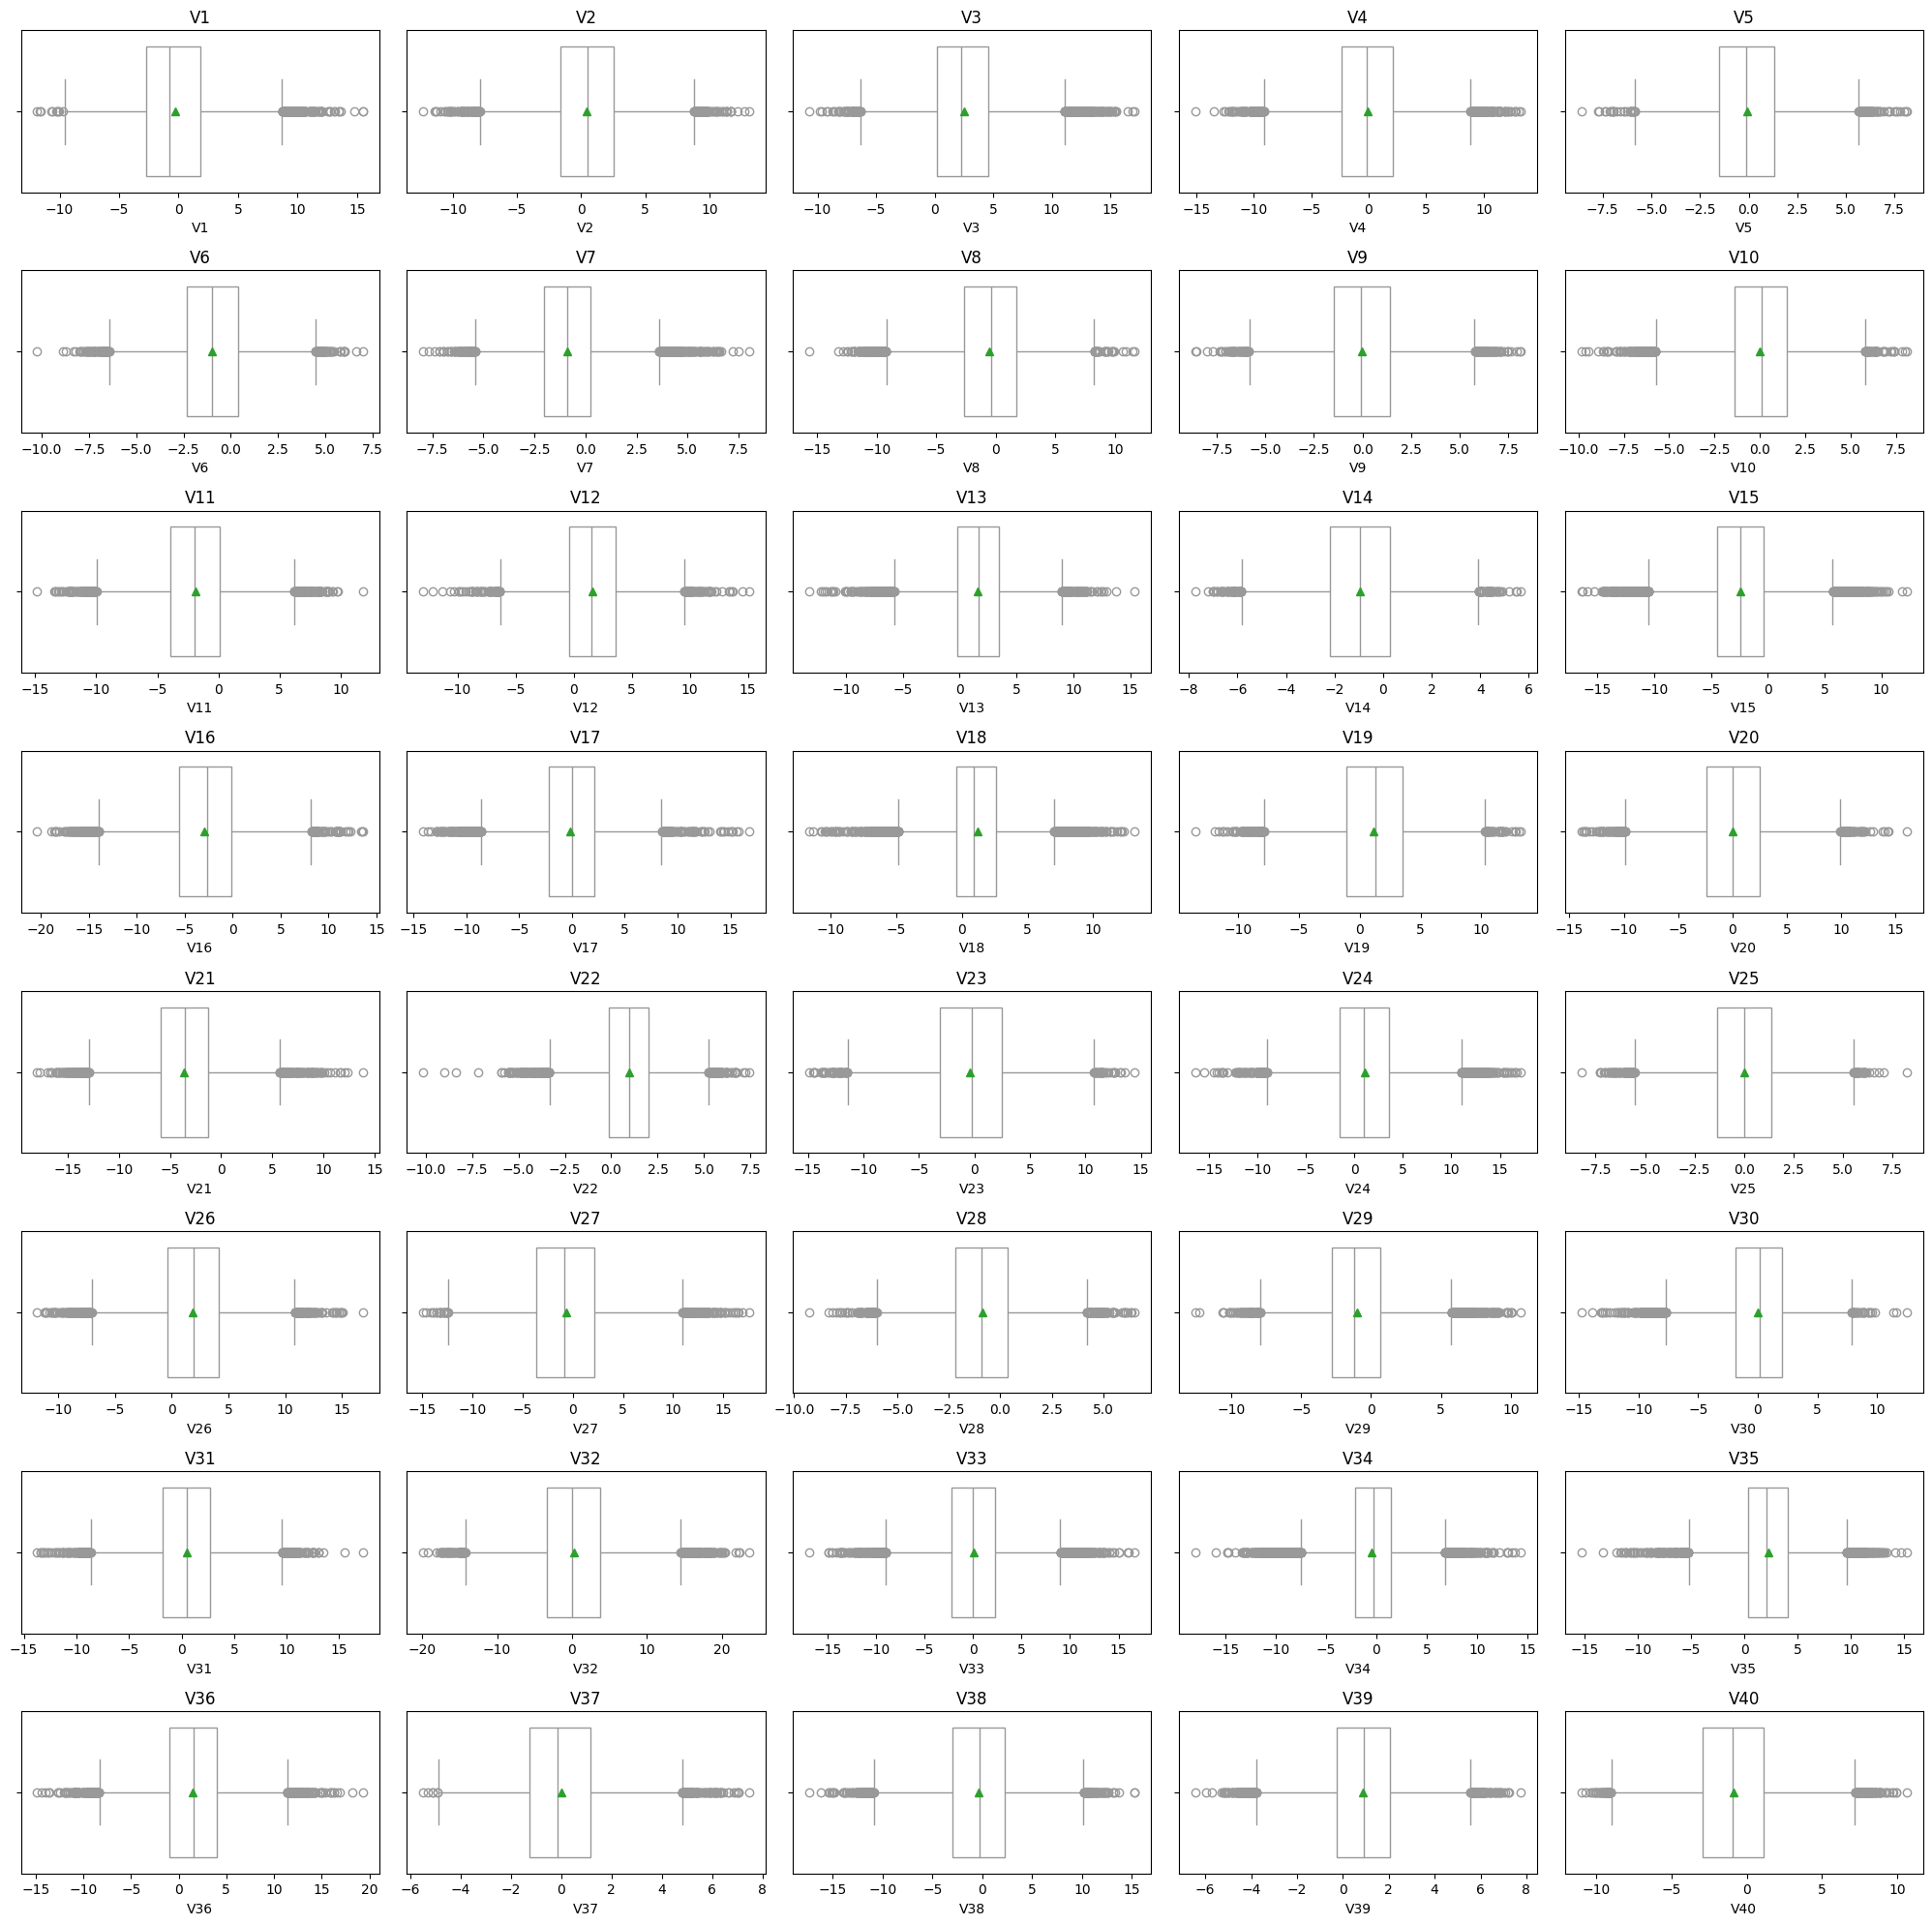

In [13]:
# Create a figure with 8 rows and 5 columns of box and whisker subplots without the target variable
fig, axes = plt.subplots(8, 5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a boxplot for each feature in the train set
for i, feature in enumerate(train_set.columns[:-1]):  # Exclude the target variable
    sns.boxplot(data=train_set, x=feature, ax=axes[i], color="white", showmeans=True)
    axes[i].set_title(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


##### Histograms

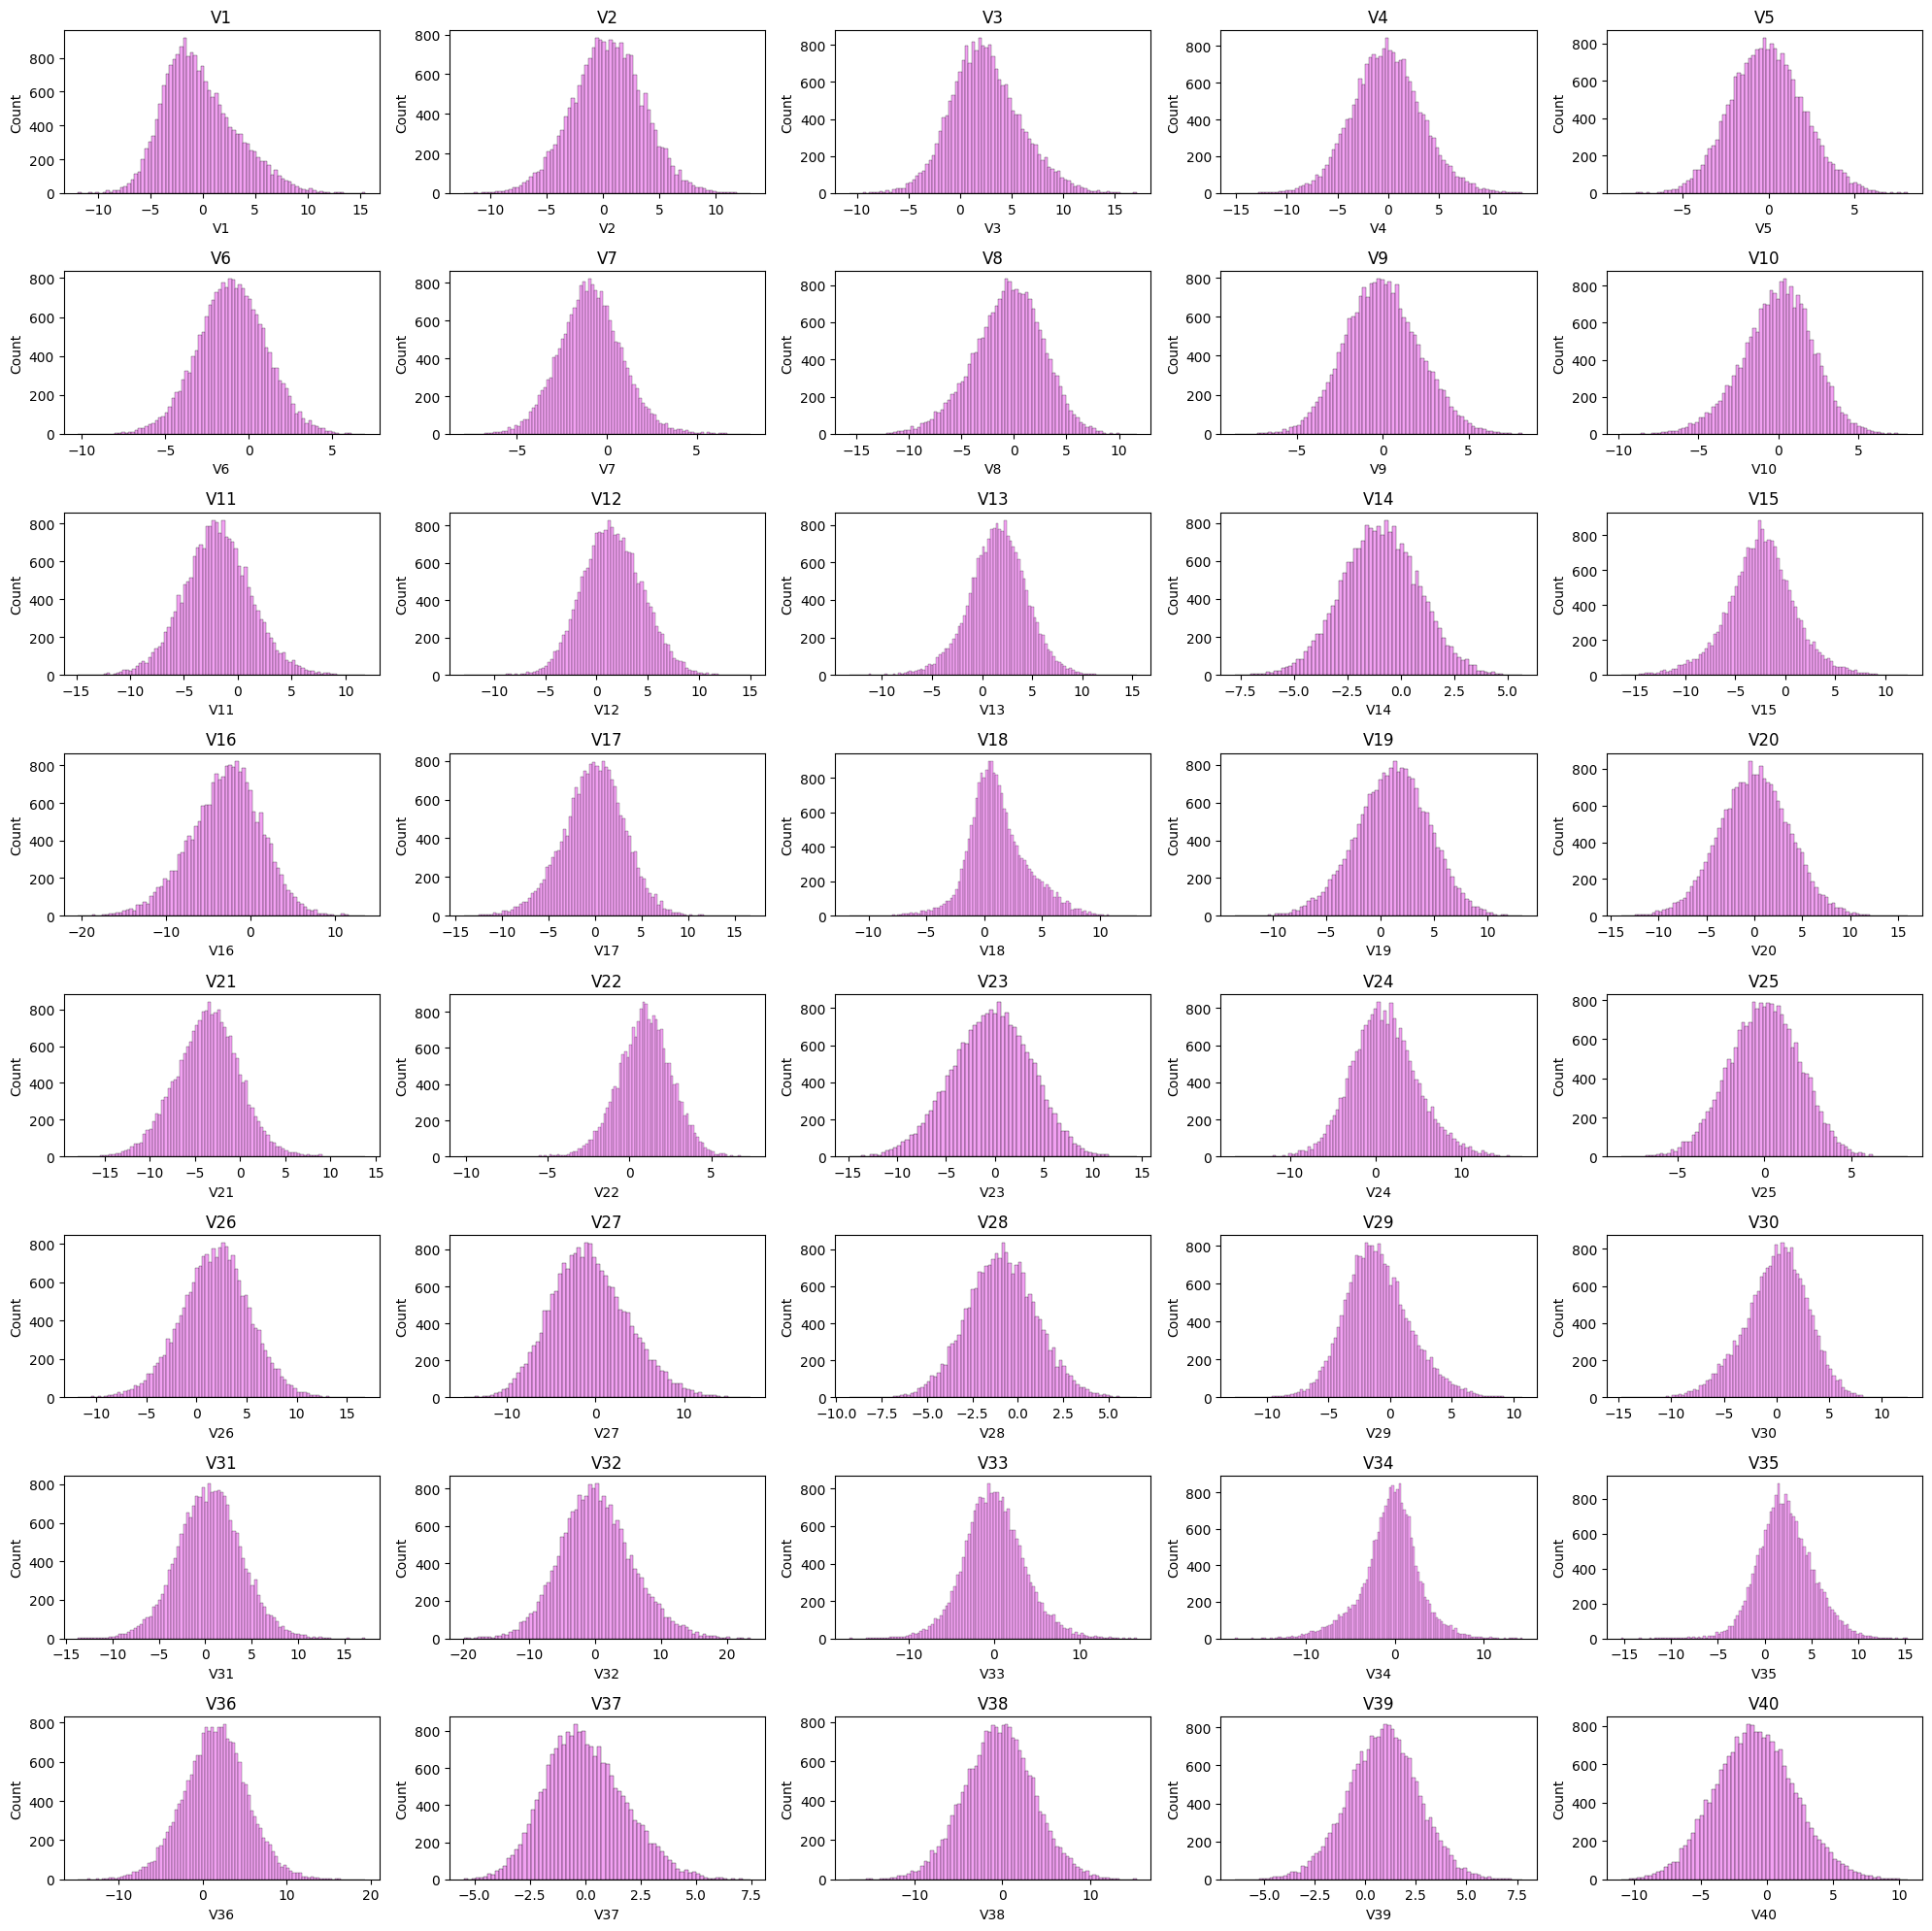

In [14]:
# Create a figure with 8 rows and 5 columns of histogram subplots without the target variable
fig, axes = plt.subplots(8, 5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histplot for each feature in the train set
for i, feature in enumerate(train_set.columns[:-1]):  # Exclude the target variable
    sns.histplot(data=train_set, x=feature, ax=axes[i], color="violet")
    axes[i].set_title(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**All independent variables have a relatively normal distribution with small variations in skewedness and standard deviation.**

##### Evaluate the balance of the target variable

Text(0.5, 1.0, 'Count of Target Variable')

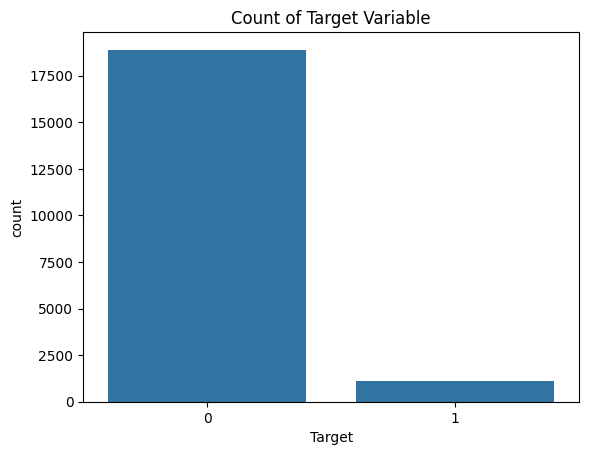

In [15]:
#Create a countplot for the target variable
sns.countplot(data=train_set, x='Target')
plt.title('Count of Target Variable')


In [16]:
#Check the proportion of the target variable
train_set['Target'].value_counts(normalize=True)

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64

**94 percent of the target variable is 0 (No failure) while 6 percent is 1 (failure). This is a highly imbalanced dataset.**

### Bivariate Analysis

<Axes: >

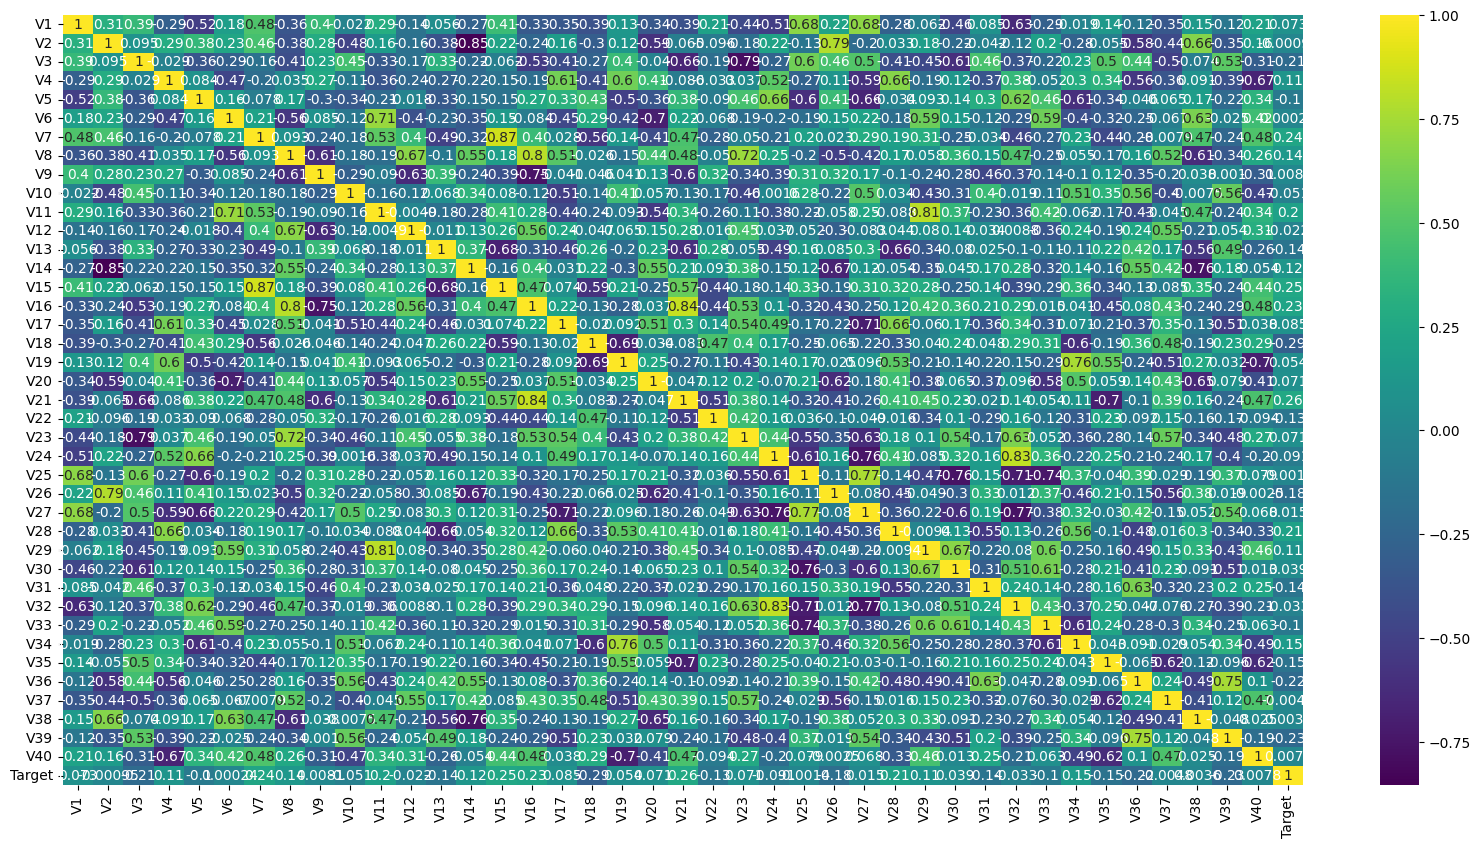

In [17]:
#Create a heatmap to check for correlation
plt.figure(figsize=(20, 10))
sns.heatmap(train_set.corr(), annot=True, cmap='viridis')

## Data Pre-processing

### Separate the target variable from and the independent variables in the training data

In [18]:
#Create two datasets for the features and the target variable
X = train_set.drop('Target', axis=1)
y = train_set['Target'] 

In [19]:
#Check the shape of each dataset
X.shape, y.shape

((20000, 40), (20000,))

### Split the Training dataset into train and validation sets

In [20]:
#Split the dataset into training and validation sets using a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y) #Stratify the target variable to ensure equal distribution of the classes

In [21]:
#Look at the shape of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14000, 40), (6000, 40), (14000,), (6000,))

In [22]:
#Split the test set into features and target variable
X_test = test_set.drop('Target', axis=1)
y_test = test_set['Target']

In [23]:
#Look at the shape of the test set
X_test.shape, y_test.shape

((5000, 40), (5000,))

## Missing value imputation




In [24]:
#Use imputer to fill missing values in datasets
imputer = SimpleImputer(strategy='median') #Fill missing values with the median of the column


In [25]:
#Fit the imputer on the training data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

#Transform the validation and test sets
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns) 
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [26]:
#Verify that there are no missing values in the datasets
X_train.isnull().sum().sum(), X_val.isnull().sum().sum(), X_test.isnull().sum().sum()

(np.int64(0), np.int64(0), np.int64(0))

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**
**Recall**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix while evaluating models.**

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [28]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [48]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("rfc", RandomForestClassifier(random_state=1)))
models.append(("ada", AdaBoostClassifier(random_state=1)))
models.append(("bag", BaggingClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result) # Append the results to the results list
    names.append(name) # Append the names to the names list
    print("{}: {}".format(name, cv_result.mean())) # Print the results

print("\n" "Validation Performance:" "\n") # Print the validation performance

for name, model in models: # Loop through all models
    model.fit(X_train, y_train) # Fit the model
    scores = recall_score(y_val, model.predict(X_val)) # Get the recall score
    print("{}: {}".format(name, scores)) # Print the recall score


Cross-Validation performance on training dataset:

dtree: 0.7026799007444169
rfc: 0.7117121588089329
ada: 0.5314474772539288
bag: 0.7001157981803143
log_reg: 0.49548387096774194
gboost: 0.7001240694789082

Validation Performance:

dtree: 0.7417417417417418
rfc: 0.7537537537537538
ada: 0.5465465465465466
bag: 0.7117117117117117
log_reg: 0.43843843843843844
gboost: 0.7117117117117117


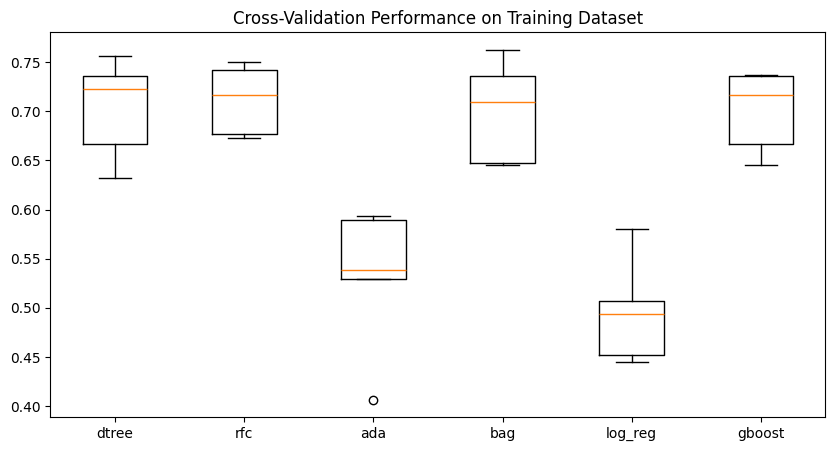

In [50]:
#Create a boxplot to visualize the cross-validated scores of the models
plt.figure(figsize=(10, 5)) # Set the figure size
plt.boxplot(results1) # Create a boxplot
plt.xticks(range(1, 7), names) # Set the xticks
plt.title("Cross-Validation Performance on Training Dataset") # Set the title
plt.show()

**Decision Tree, Random Forest, and Bagging Classifiers had the highest CV scores**

### Model Building with Oversampled data


In [51]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train) # Fit and apply the SMOTE

In [52]:
#Check the distribution of the target variable before oversampling and after oversampling 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0)))

#Check the shape of the training set before and after oversampling
X_train.shape, X_train_over.shape, y_train.shape, y_train_over.shape


Before OverSampling, counts of label '1': 777
Before OverSampling, counts of label '0': 13223 

After OverSampling, counts of label '1': 13223
After OverSampling, counts of label '0': 13223


((14000, 40), (26446, 40), (14000,), (26446,))

In [53]:
#Build models using the oversampled data
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("rfc", RandomForestClassifier(random_state=1)))
models.append(("ada", AdaBoostClassifier(random_state=1)))
models.append(("bag", BaggingClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9693711481429581
rfc: 0.9826062933803111
ada: 0.8833098158544223
bag: 0.972321166588974
log_reg: 0.8709822146086728
gboost: 0.9249038662277753

Validation Performance:

dtree: 0.8018018018018018
rfc: 0.8588588588588588
ada: 0.8828828828828829
bag: 0.8258258258258259
log_reg: 0.8708708708708709
gboost: 0.9039039039039038


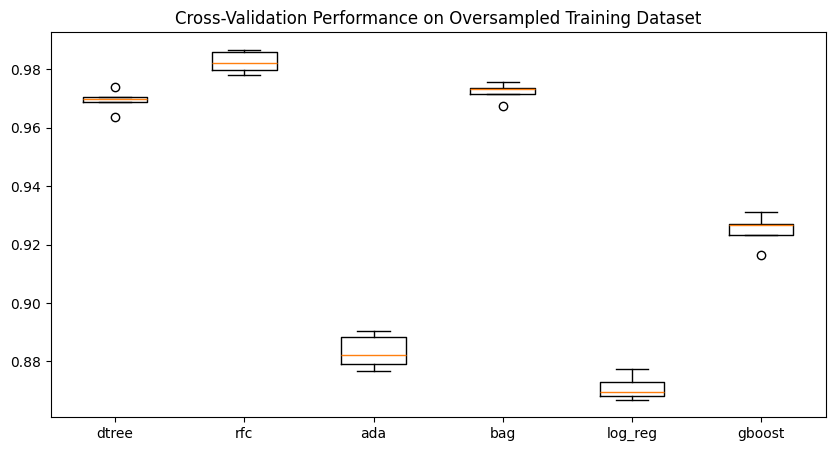

In [54]:
#Create a boxplot to visualize CV scores with Oversampling
plt.figure(figsize=(10, 5))
plt.boxplot(results1)
plt.xticks(range(1, 7), names)
plt.title("Cross-Validation Performance on Oversampled Training Dataset")
plt.show()

### Model Building with Undersampled data

In [55]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [56]:
#check distribution of target variables before and after undersampling
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_un == 0)))

#check the shape of the training data before and after undersampling
X_train.shape, X_train_un.shape, y_train.shape, y_train_un.shape

Before Undersampling, counts of label '1': 777
Before Undersampling, counts of label '0': 13223 

After Undersampling, counts of label '1': 777
After Undersampling, counts of label '0': 777


((14000, 40), (1554, 40), (14000,), (1554,))

In [58]:
#Build models using oversampled data

models = [] #create empty list to store models

models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("rfc", RandomForestClassifier(random_state=1)))
models.append(("ada", AdaBoostClassifier(random_state=1)))
models.append(("bag", BaggingClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))

results1 = [] #create empty list to store CV scores
names = [] #create empty list to store model names

#loop through all models to get a mean CV score
print("\n" "Cross-Validation performance on training dataset:" "\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold)
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

#print validation performance
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8417452440033084
rfc: 0.8932671629445824
ada: 0.8675020678246484
bag: 0.8418031430934656
log_reg: 0.8404797353184451
gboost: 0.8778163771712159

Validation Performance:

dtree: 0.8438438438438438
rfc: 0.9069069069069069
ada: 0.8678678678678678
bag: 0.8678678678678678
log_reg: 0.8738738738738738
gboost: 0.9129129129129129


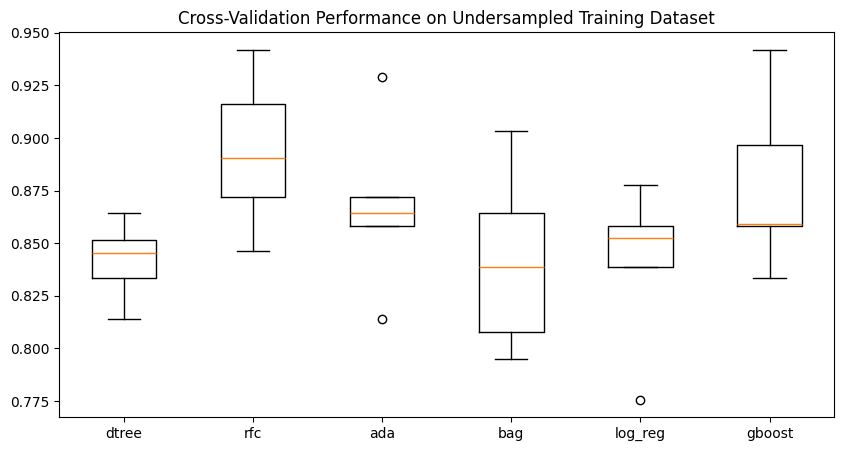

In [60]:
# Create boxplot to visualize CV scores after understampling
plt.figure(figsize=(10, 5))
plt.boxplot(results1)
plt.xticks(range(1, 7), names)
plt.title("Cross-Validation Performance on Undersampled Training Dataset")
plt.show()

### Compare the best models to tune

**The models that will be tuned**
*   RFC Undersample
*   Adaboost Oversample
*   GBoost Oversample
*   GBoost Oversample
*   Adaboost Undersample
*   Log Reg Undersample

## HyperparameterTuning

### Tuning Random Forest Classifier Undersample

In [39]:
#Define the Model
model = RandomForestClassifier(random_state=1)

#RandomsearchCV Parameters
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV on undersamped data
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 250, 'min_samples_leaf': np.int64(2), 'max_samples': np.float64(0.5), 'max_features': 'sqrt'} with CV Score: 0.8906203473945409


In [40]:
#Implement the best parameters
rf_tuned = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, max_features='sqrt', max_samples=0.5, random_state=1)

#Fit the best parameters on the undersampled training data
rf_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=250,
                       random_state=1)

In [41]:
#Check the performance of the model on the undersampled training data
rf_tuned_train = model_performance_classification_sklearn(rf_tuned, X_train_un, y_train_un)
rf_tuned_train

,Accuracy,Recall,Precision,F1
0,0.966538,0.936937,0.995896,0.965517


In [42]:
#Check the performance of the model on the validation set
rf_tuned_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
rf_tuned_val

,Accuracy,Recall,Precision,F1
0,0.9465,0.903904,0.510169,0.652221


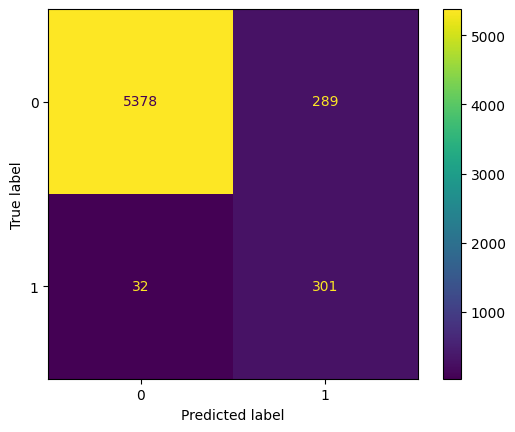

In [73]:
#Create confusion matrix for rf_tuned model
cm = confusion_matrix(y_val, rf_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


### Tuning Adaboost Oversample

In [84]:
#Define the model
model = AdaBoostClassifier(random_state=1)

#RandomsearchCV Parameters
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=3, random_state=1)]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV
random_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [0.2, 0.05],
                                        'n_estimators': [100, 150, 200]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [85]:
print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV Score: 0.9143911813743856


In [86]:
#Implement the best parameters
ada_tuned = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=3, random_state=1), random_state=1)

#Fit the best parameters on the oversampled training data
ada_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [87]:
#Check the performance of the tuned Adaboost model on the oversampled training data
ada_tuned_train = model_performance_classification_sklearn(ada_tuned, X_train_over, y_train_over)
ada_tuned_train

,Accuracy,Recall,Precision,F1
0,0.93689,0.91666,0.955312,0.935587


In [88]:
#Check the performance of the tuned Adaboost model on the validation set
ada_tuned_val = model_performance_classification_sklearn(ada_tuned, X_val, y_val)
ada_tuned_val

,Accuracy,Recall,Precision,F1
0,0.9475,0.903904,0.515411,0.656489


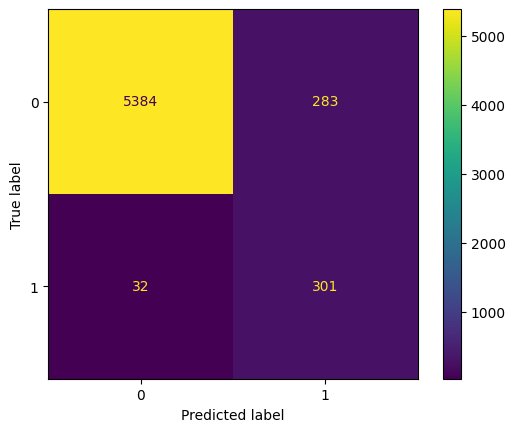

In [89]:
#Create confusion matrix for ada_tuned model
cm = confusion_matrix(y_val, ada_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


### Tuning Gradient Boost Classifier Undersample

In [61]:
#Define the model
model = GradientBoostingClassifier(random_state=1)

#Parameters for RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV on Undersampled data
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'subsample': 0.5, 'n_estimators': np.int64(125), 'max_features': 0.5, 'learning_rate': 0.2} with CV Score: 0.8918941273779983


In [63]:
#Implement the best parameters
gboost_tuned = GradientBoostingClassifier(subsample=0.5, n_estimators=125, max_features=0.5, learning_rate=0.2, random_state=1)

#Fit the best parameters on the undersampled Validation data
gboost_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.5)

In [65]:
#Check the performance on the undersampled training data
gboost_tuned_train = model_performance_classification_sklearn(gboost_tuned, X_train_un, y_train_un)
gboost_tuned_train

,Accuracy,Recall,Precision,F1
0,0.992921,0.98713,0.998698,0.99288


In [66]:
#Check the performance on the validation data
gboost_tuned_val = model_performance_classification_sklearn(gboost_tuned, X_val, y_val)
gboost_tuned_val

,Accuracy,Recall,Precision,F1
0,0.914667,0.918919,0.386852,0.544484


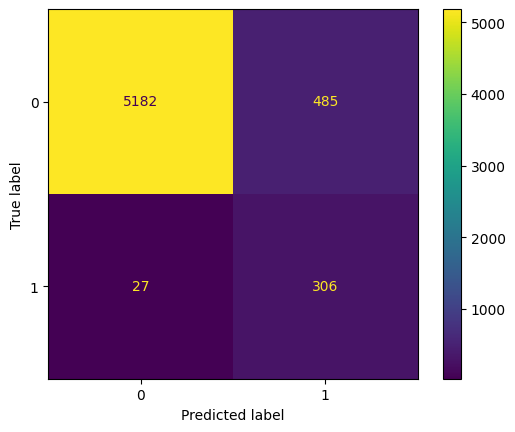

In [71]:
#Create confusion matrix for gboost_tuned model
cm = confusion_matrix(y_val, gboost_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


### Tuning Gradient Boost Classifier Oversample

In [67]:
#Define the model
model = GradientBoostingClassifier(random_state=1)

#Parameters for RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV on Undersampled data
random_search.fit(X_train_over, y_train_over)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'subsample': 0.7, 'n_estimators': np.int64(125), 'max_features': 0.7, 'learning_rate': 1} with CV Score: 0.9682369040435382


In [75]:
#Implement the best parameters
gboost_over_tuned = GradientBoostingClassifier(subsample=0.7, n_estimators=125, max_features=0.7, learning_rate=1, random_state=1)

#Fit the best parameters on the oversampled Validation data
gboost_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           random_state=1, subsample=0.7)

In [76]:
#Check the performance on the oversampled training data
gboost_over_tuned_train = model_performance_classification_sklearn(gboost_over_tuned, X_train_over, y_train_over)
gboost_over_tuned_train

,Accuracy,Recall,Precision,F1
0,0.993345,0.992513,0.994167,0.993339


In [77]:
#Check the performance on the validation data
gboost_over_tuned_val = model_performance_classification_sklearn(gboost_over_tuned, X_val, y_val)
gboost_over_tuned_val

,Accuracy,Recall,Precision,F1
0,0.966833,0.867868,0.650901,0.743887


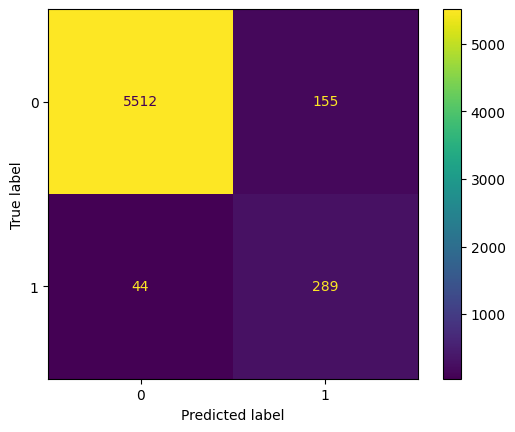

In [78]:
#Create confusion matrix for gboost_over_tuned model
cm = confusion_matrix(y_val, gboost_over_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()

* This Model is overfitting the training data
* The Recall score is lower than the previous models

### Tuning Adaboost Undersample

In [90]:
#Define the model
model = AdaBoostClassifier(random_state=1)

#RandomsearchCV Parameters
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV Score: 0.8880314309346569


### Tuning Logistic Regression Undersample

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

## Model performance comparison and choosing the final model

### Test set final performance

## Pipelines to build the final model


# Business Insights and Conclusions

***